In [ ]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# allows us to send http requests using python
import requests
import io
import json

In [ ]:
image = cv2.imread('Car2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

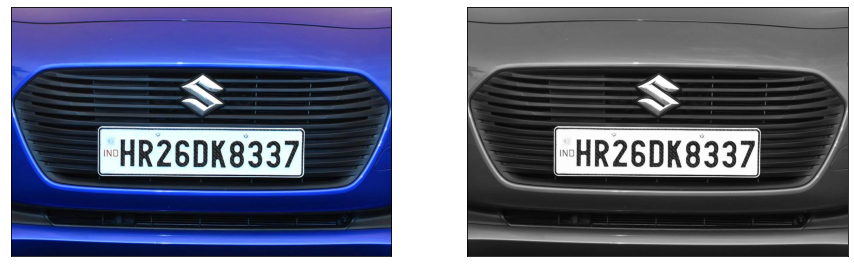

In [ ]:
plot_images(image, gray)

In [ ]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)
#d: Diameter of each pixel neighborhood.
#sigmaColor: Value of \sigma in the color space. The greater the value, the colors farther to each other will start to get mixed.
#sigmaColor: Value of \sigma in the coordinate space. The greater its value, the more further pixels will mix together, given that their colors lie within the sigmaColor range.

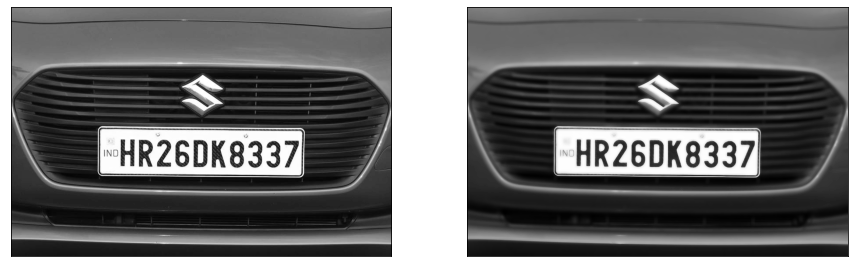

In [ ]:
plot_images(gray, blur)

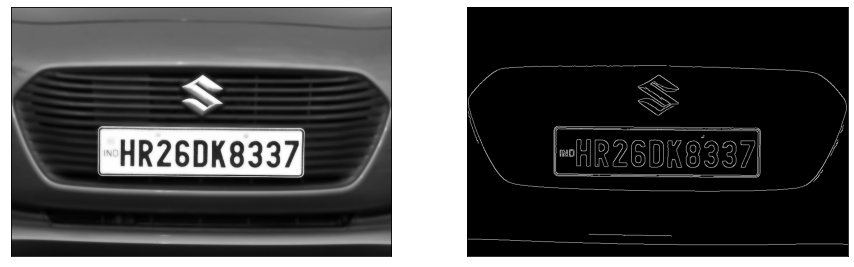

In [ ]:
edges = cv2.Canny(blur, 30, 200)
#OpenCV has in-built function cv2.Canny() which takes our input image as first argument and its aperture size(min value and max value) as last two arguments
plot_images(blur, edges)

In [ ]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#contour retrieval mode and contour approximation method

In [ ]:
image_copy = image.copy()

In [ ]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),1)

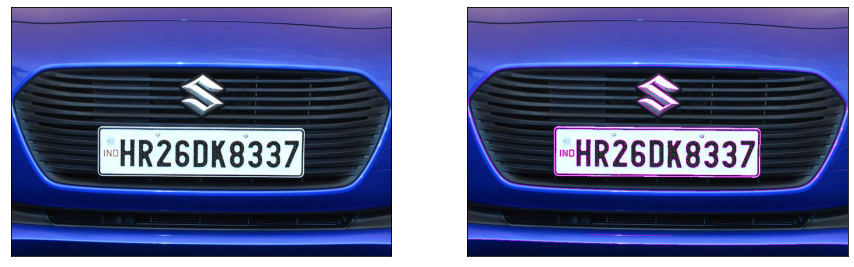

In [ ]:
plot_images(image, image_copy)

In [ ]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
#Sorts in decending order

In [ ]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

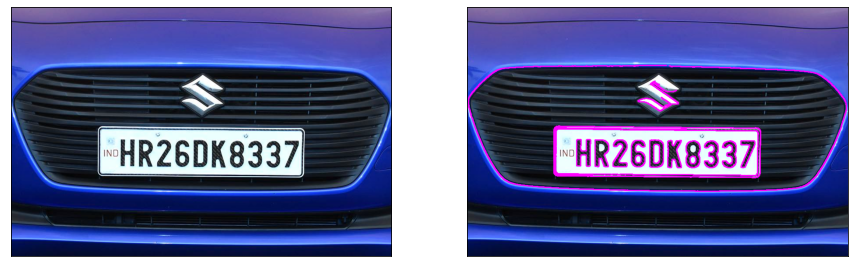

In [ ]:
plot_images(image, image_copy)

In [ ]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite('plate.png', plate)

True

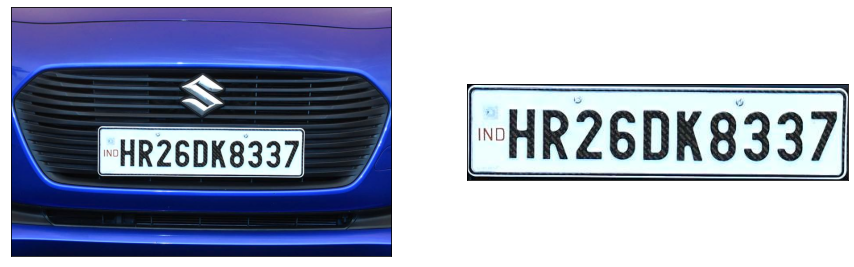

In [ ]:
plot_images(image, plate)

In [ ]:
height, width, _ = plate.shape     #by this we can get the size of an image
#print(img.shape)
#cutting of image
roi = plate[0: height,0: width]    #region of interest
#OCR
url_api = "https://api.ocr.space/parse/image"
_,compressedimage  = cv2.imencode(".jpg",roi,[1, 90])
file_bytes = io.BytesIO(compressedimage)


result = requests.post(url_api,
              files = {"Car.jpg":file_bytes},
              data = {"apikey":"6dd821df7188957"})
result=result.content.decode()
result = json.loads(result)
#print(result)
text_detected = result.get("ParsedResults")[0].get("ParsedText")
print(text_detected[0:2] + ' ' + text_detected[2:4] + ' ' + text_detected[4:6] + ' ' + text_detected[6:10])
#print(text_detected)

HR 26 DK 8337
